<a href="https://colab.research.google.com/github/wisraelsen/Jumping-Mouse-Publication-Analysis/blob/main/Reference_Notebook_Milestone_1_Deep_Learning_WJI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Milestone 1

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

###<b> Mounting the Drive

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### <b>Loading libraries</b>

In [2]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/MIT_ADSP_Capstone_Project/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [4]:
# Storing the path of the extracted "train" folder 
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [5]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):
    
        try:
    
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
            
                train_labels.append(1)
           
            else:
           
                train_labels.append(0)
        
        except Exception:
       
            pass       

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [6]:
# Storing the path of the extracted "test" folder 
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [7]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)
            
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))
            
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass       

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [8]:
# Shape of images
print('Training Images:', train_images.shape)
print('Test Images:', test_images.shape)

Training Images: (24958, 64, 64, 3)
Test Images: (2600, 64, 64, 3)


###<b> Checking the shape of train and test labels

In [9]:
# Shape of labels 
print('Training Labels:', train_labels.shape)
print('Test Labels:', test_labels.shape)

Training Labels: (24958,)
Test Labels: (2600,)


####<b> Observations and insights:
- We have now prepared the test and training images and have the expected number.
- Images have all been resized to 64 x 64 x 3

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy

print('Training Images min pixel value:', np.min(train_images))
print('Training Images max pixel value:', np.max(train_images))
print()
print('Test Images min pixel value:', np.min(test_images))
print('Test Images max pixel value:', np.max(test_images))

Training Images min pixel value: 0
Training Images max pixel value: 255

Test Images min pixel value: 0
Test Images max pixel value: 255


####<b> Observations and insights:</b>
- We have the full range of pixel values (0 to 255) in both test and training images sets.





###<b> Count the number of values in both uninfected and parasitized 

In [24]:
# Try to use value_counts to count the values

print(f'Train Images Uninfected:\n {pd.value_counts(train_images[train_labels==0].flatten())}\n\n')
print(f'Train Images Infected:\n {pd.value_counts(train_images[train_labels==1].flatten())}\n\n')

print(f'Test Images Uninfected:\n {pd.value_counts(test_images[test_labels==0].flatten())}\n\n')
print(f'Test Images Infected:\n {pd.value_counts(test_images[test_labels==1].flatten())}\n\n')

Train Images Uninfected:
 0      37127091
154     2029992
155     2012413
179     1995153
178     1971274
         ...   
250         302
251         258
252         219
253         182
254         161
Length: 256, dtype: int64


Train Images Infected:
 0      39147002
144     1877157
145     1876271
146     1870811
154     1869312
         ...   
250         332
251         284
252         247
253         196
254         180
Length: 256, dtype: int64


Test Images Uninfected:
 0      4147374
154     256174
153     255177
155     249826
152     247603
        ...   
250        169
253        139
252        136
251        135
254        125
Length: 256, dtype: int64


Test Images Infected:
 0      4255994
154     256514
153     253807
155     249318
152     245808
        ...   
251         24
252         14
253         13
255          8
254          4
Length: 256, dtype: int64




###<b>Check distribution of pixel values ('curves') by BGR channel

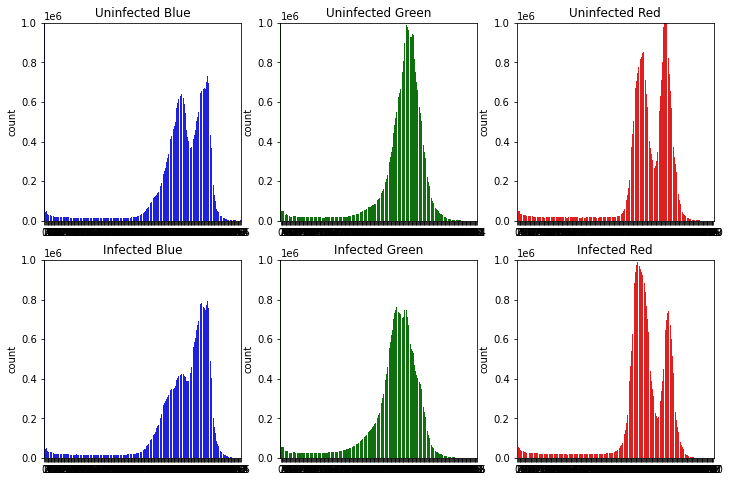

In [11]:
# get and plot flattened arrays of train and test images by infected or uninfected status
plt.figure(figsize = (12, 8))

plt.subplot(2,3,1)
ax = plt.gca()
ax.set_ylim(0, 1000000)
sns.countplot(train_images[train_labels==0,:,:,0].flatten(), ax=ax, color='b') # uninfected blue channel
plt.title('Uninfected Blue')

plt.subplot(2,3,4)
ax = plt.gca()
ax.set_ylim(0, 1000000)
sns.countplot(train_images[train_labels==1,:,:,0].flatten(), ax=ax, color='b') # infected blue channel

plt.title('Infected Blue')

plt.subplot(2,3,2)
ax = plt.gca()
ax.set_ylim(0, 1000000)
sns.countplot(train_images[train_labels==0,:,:,1].flatten(), ax=ax, color='g') # uninfected green channel

plt.title('Uninfected Green')

plt.subplot(2,3,5)
ax = plt.gca()
ax.set_ylim(0, 1000000)
sns.countplot(train_images[train_labels==1,:,:,1].flatten(), ax=ax, color='g') # infected green channel

plt.title('Infected Green')

plt.subplot(2,3,3)
ax = plt.gca()
ax.set_ylim(0, 1000000)
sns.countplot(train_images[train_labels==0,:,:,2].flatten(), ax=ax, color='r') # uninfected red channel

plt.title('Uninfected Red')

plt.subplot(2,3,6)
ax = plt.gca()
ax.set_ylim(0, 1000000)
sns.countplot(train_images[train_labels==1,:,:,2].flatten(), ax=ax, color='r') # infected red channel

plt.title('Infected Red')

plt.show()

####<b> Observations and insights:
- The distribution of pixel values looks similar, but not identical, between the infected and uninfected images.
- There should be differences between the two groups (note that these images can be classified by eye, so we do expect differences).
- In aggregate, the color values are look pretty comparable between the two types of images. We can go ahead and normalize the pixel values.





###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = train_images.astype('float32')/255

test_images = test_images.astype('float32')/255

####<b> Observations and insights:
- We have a very "balanced" set of test and training data. There is an even split of uninfected and parasitized images
- I normalized the images by dividing pixel values by 255.

###<b> Plot to check if the data is balanced

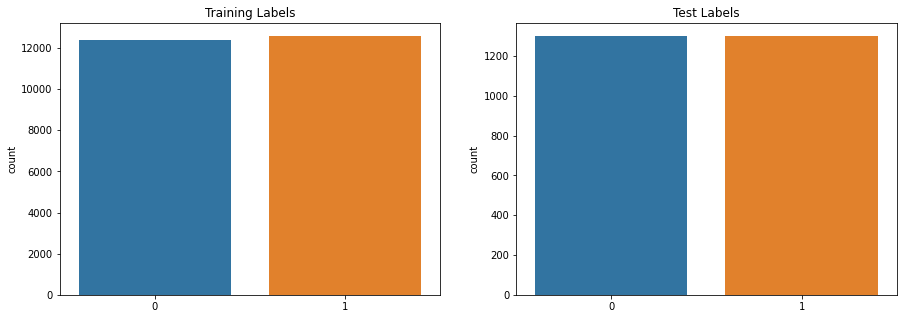

In [ ]:
# You are free to use bar plot or pie-plot or count plot, etc. to plot the labels of train and test data and check if they are balanced

plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(train_labels)
plt.title('Training Labels')
plt.subplot(1,2,2)
sns.countplot(test_labels)
plt.title('Test Labels')
plt.show()


####<b> Observations and insights:
- We have a balanced set of training and test data.

### <b>Data Exploration</b>
Let's visualize the images from the train data

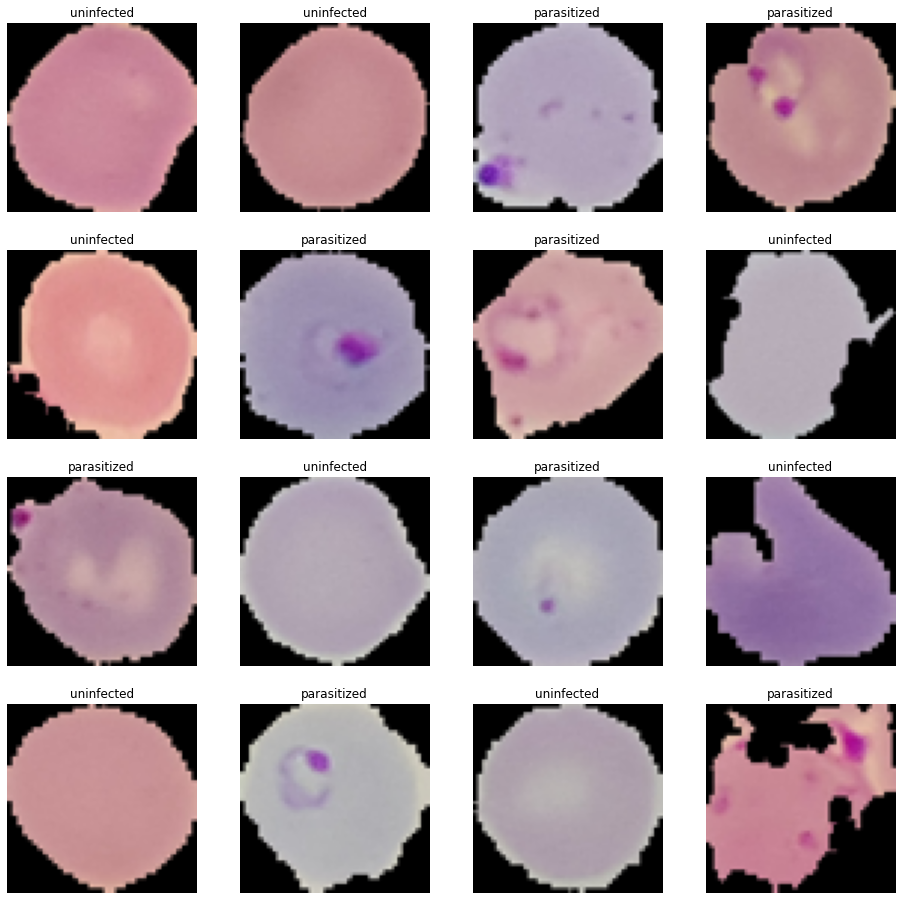

In [ ]:
# This code will help you in visualizing both the parasitized and uninfected images
np.random.seed(42)

plt.figure(1, figsize = (16 , 16))

for n in range(1, 17):

    plt.subplot(4, 4, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b> Observations and insights:

- Our color images look fine.
- It appears that there are visual differences between the uninfected and parasitized images.


###<b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

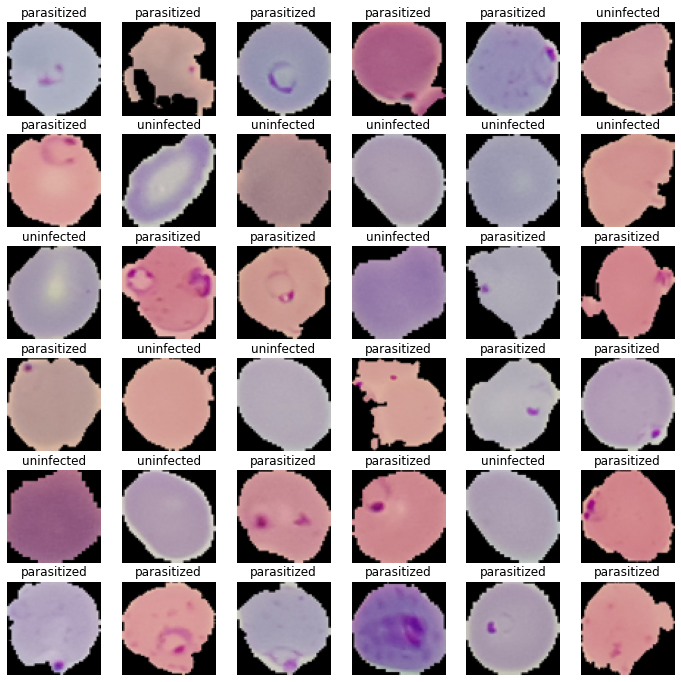

In [ ]:
# Hint: Have a keen look into the number of iterations that the for loop should iterate

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1: 

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')

####<b>Observations and insights:
- This size of image is a little easier to see on my screen.
- The same pattern of visual difference holds between the two conditions; the parasitized images have purple spots in them.

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

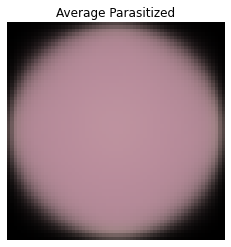

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:
              
              parasitized_data.append([img])          

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

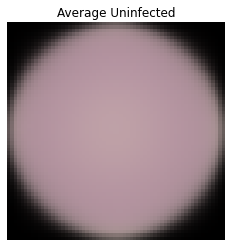

In [ ]:
# Similarly write the code to find the mean image of uninfected
uninfected_data = []  # Create a list to store the uninfected data

for img, label in zip(train_images, train_labels):

        if label == 0:
              
              uninfected_data.append([img])          

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean



####<b> Observations and insights:
- We lose the defined purple spots when averaging the images, but the two classes seem to have slightly different colors on average.
- The parasitized images have more purple on average.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


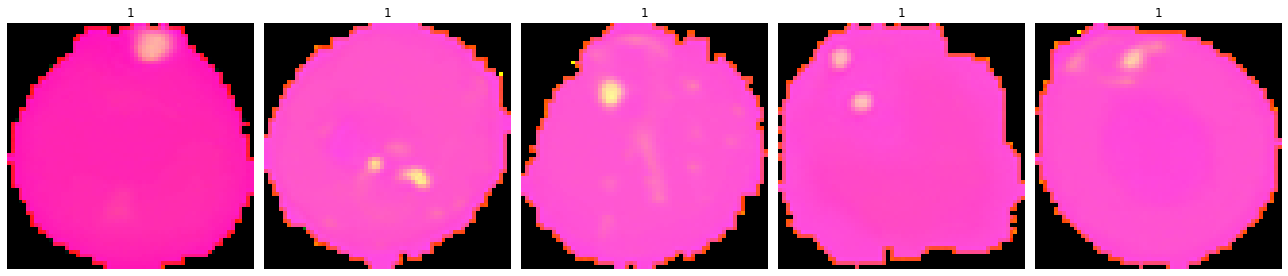

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Converting the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


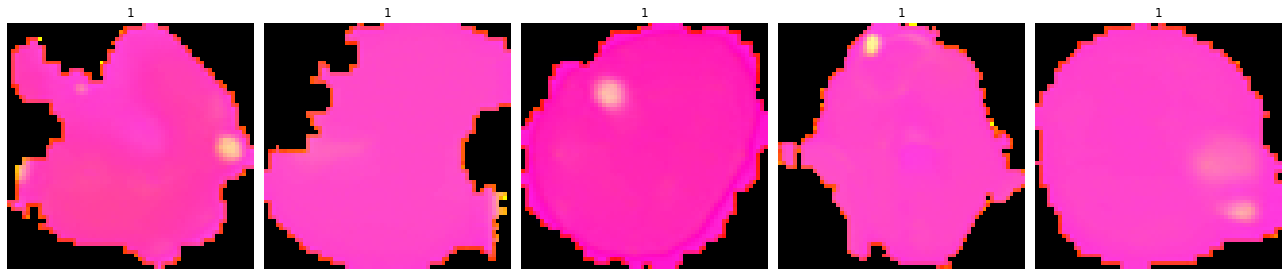

In [ ]:
# Similarly you can visualize for the images in the test data

# Convert test data

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  
  gfx.append(a)

gfx = np.array(gfx)

# View the converted test images

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()
  
  fig.tight_layout()

####<b>Observations and insights:
- Converting the training and test images to HSV seems to "normalize" them and bring out the spots as bright highlights.
- This may help us have a consistent feature within the image to train on.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

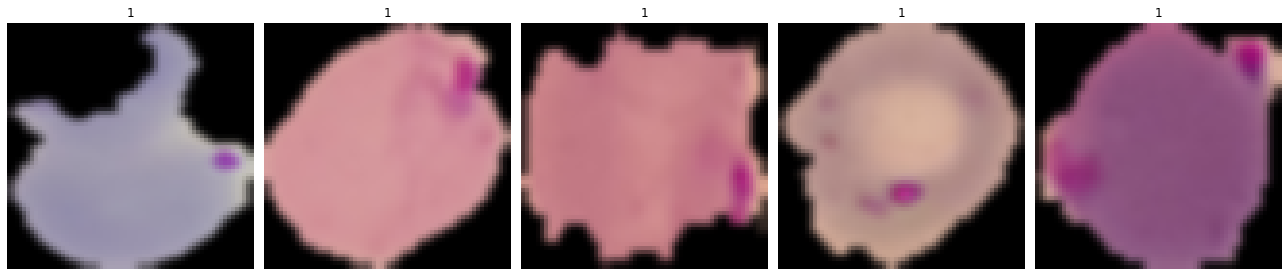

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

###<b> Gaussian Blurring on test data

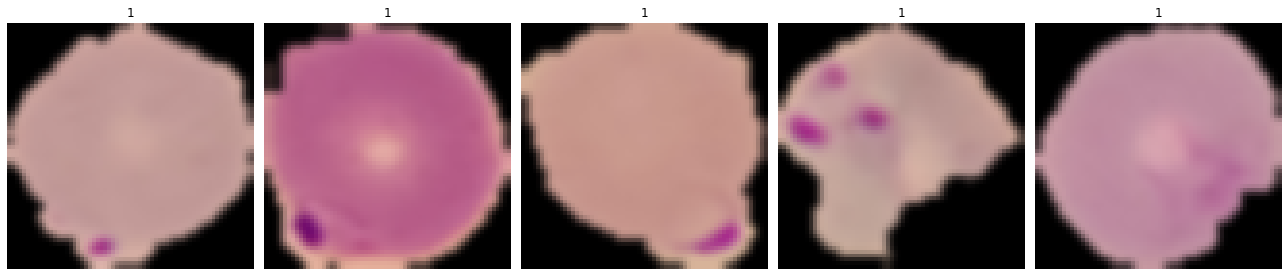

In [ ]:
# Similarly you can apply Gaussian blurring for the images in the test data

# Apply blur
gbx = []  # To hold the blurred images

for i in np.arange(0, 100, 1):

  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx.append(b)

gbx = np.array(gbx)

# View images

viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  
  ax[t].imshow(gbx[i])
  
  ax[t].set_axis_off()
  
  fig.tight_layout()

####**Observations and insights:**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

- Blurring might help soften the edges between the red blood cell part of the image and the black background.
  - This could possibly help if we don't care about the sharp edge between the color and black parts of the image.
  - It also removes noise from the images.
  - Maybe all we care about is the purple spots and not the fine detail.
- We could also try some sort of threshholding or filters to highlight edges.
  - Example I found of edge detector: Sobel operator/filter

## **Proposed approach**

**Potential techniques:** What different techniques should be explored?<br>
- We could try a few different image pre-processing techniques.
- It is not clear to me a priori what is going to best help the model differentiate between the two images classes.
- I could try the HSV conversion, Gaussian blur, and Sobel filter. 

**Overall solution design:** What is the potential solution design?<br>
- I'm not sure on best practice for optimizing image pre-processing. I suggest first building the CNN model to find a good one, then iterating through the image pre-processing to see if there is any benefit to it. 
**Measures of success:** What are the key measures of success to compare different techniques?<br>
- These could include the following general measures:
  - Time to train the model. In the current case, this is probably inconsequential.
  - Ultimate outcome of the model as determined via accuracy and the confusion matrix.